In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
#Pra-pemprosesan
# Mendefinisikan fitur kategorikal dan numerik
categorical_features = ['Education', 'City', 'Gender', 'EverBenched']
numerical_features = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']

In [5]:
# Membuat pipeline untuk transformasi fitur kategorikal menggunakan OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [6]:
# Membuat pipeline untuk transformasi fitur numerik menggunakan StandardScaler
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [7]:
# Membangun preprocessor dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [8]:
# Menjalankan pra-pemrosesan pada dataset df dan mendapatkan matriks fitur X yang siap digunakan untuk pemodelan
X = preprocessor.fit_transform(df)

In [9]:
df = df.drop(['Education', 'City', 'Gender', 'EverBenched'], axis = 1)
df

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
0,2017,3,34,0,0
1,2013,1,28,3,1
2,2014,3,38,2,0
3,2016,3,27,5,1
4,2017,3,24,2,1
...,...,...,...,...,...
4648,2013,3,26,4,0
4649,2013,2,37,2,1
4650,2018,3,27,5,1
4651,2012,3,30,2,0


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


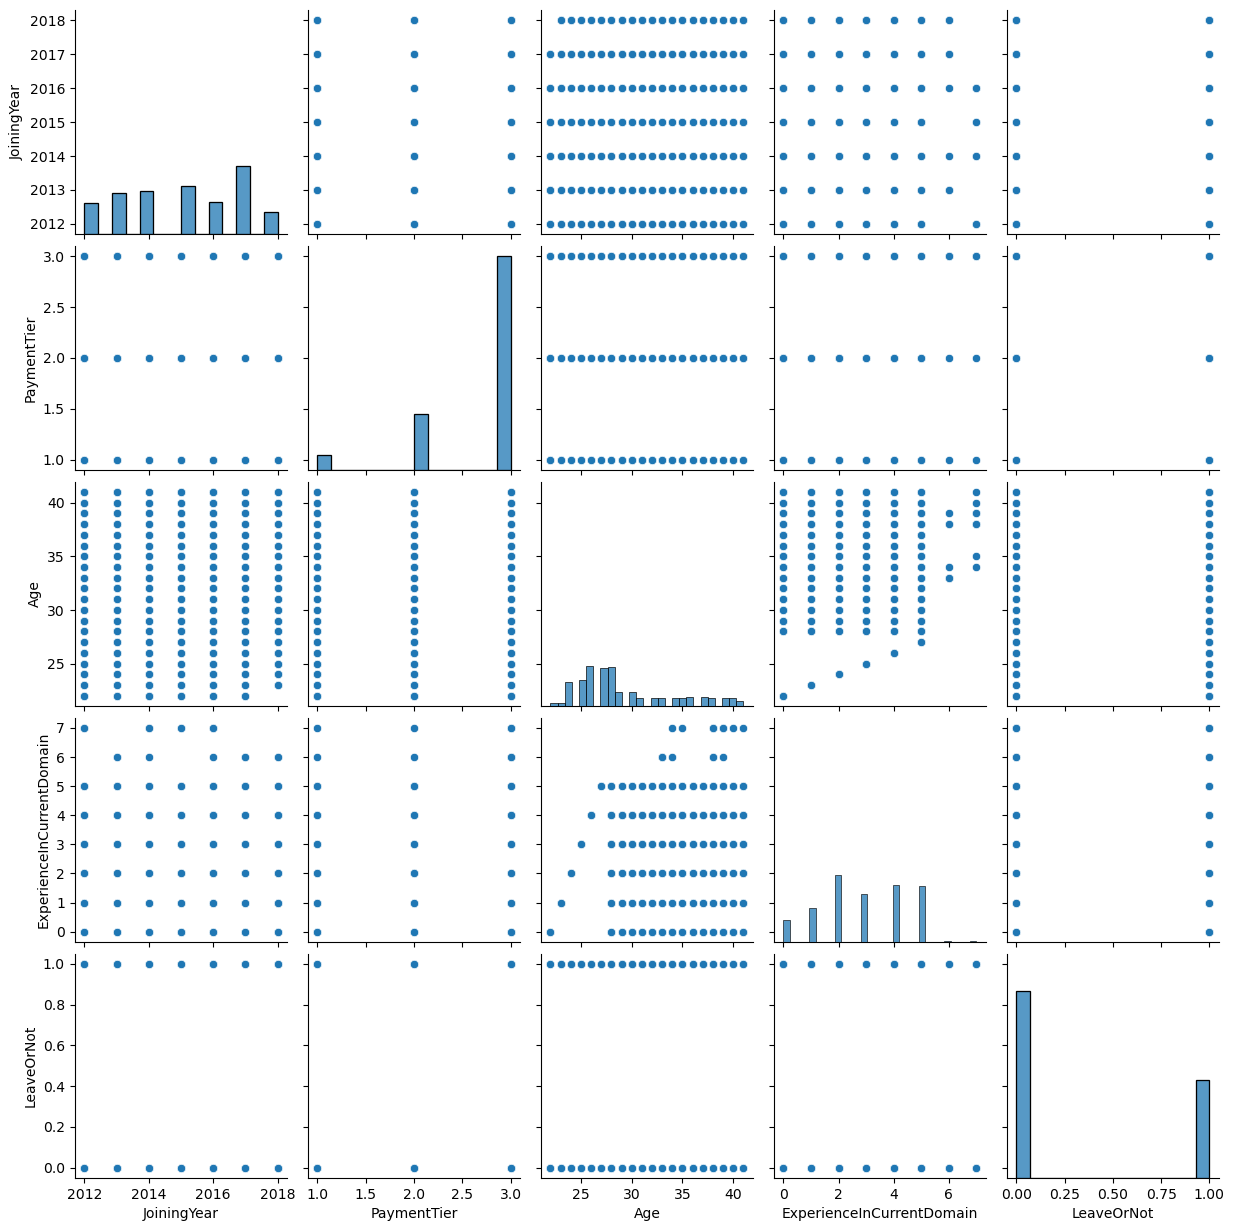

In [10]:
sns.pairplot(df)

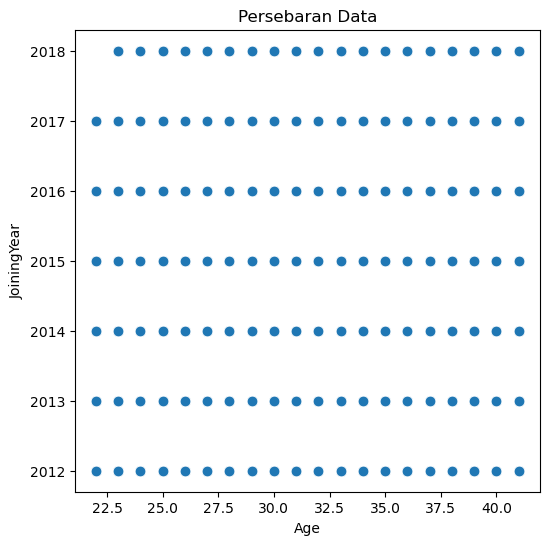

In [11]:
#persebaran data
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Age', y = 'JoiningYear', data = df, s = 60)
plt.title('Persebaran Data')
plt.show()

In [12]:
#Hitung Within Cluster Sum of Squared error (WCSS) untuk tiap kluster yang berbeda

from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(df)
    wcss.append(kmModel.inertia_)

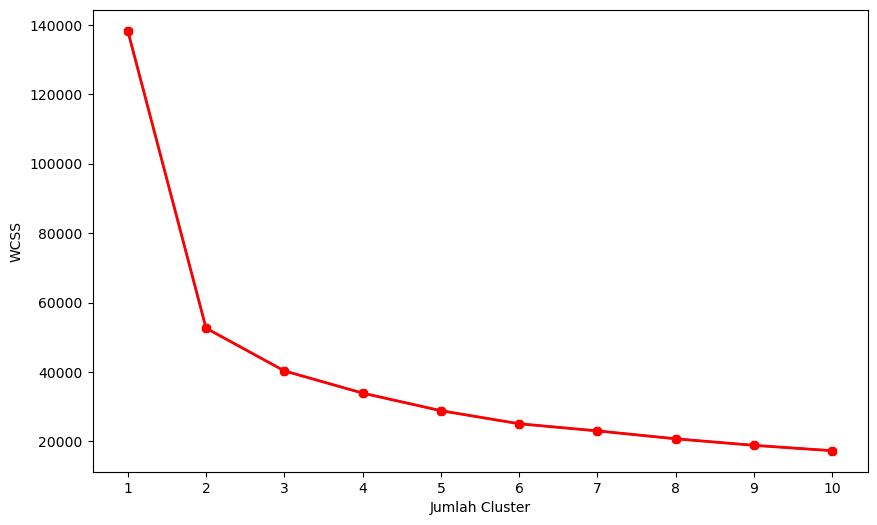

In [13]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [14]:
# model dengan 5 cluster

kmModelFix = KMeans(n_clusters = 3, n_init = 10) # n_init = 10 / 'auto'
kmModelFix.fit(df)

#Memprediksi hasil
hasil_prediksi = kmModelFix.predict(df)
print(hasil_prediksi)

[2 1 2 ... 0 1 1]


In [15]:
df['Label'] = hasil_prediksi
df.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Label
0,2017,3,34,0,0,2
1,2013,1,28,3,1,1
2,2014,3,38,2,0,2
3,2016,3,27,5,1,0
4,2017,3,24,2,1,0


In [16]:
df.to_csv("label.csv", index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_19480\1680154976.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x = 'Age', y = 'JoiningYear', hue = 'Label',


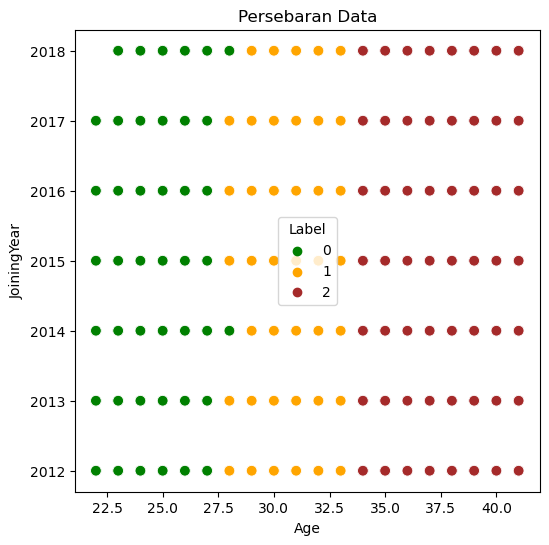

In [17]:
# Persebaran Data berserta Labelnya

plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Age', y = 'JoiningYear', hue = 'Label',
palette = ['green', 'orange', 'brown', 'dodgerblue', 'red'], legend = 'full', data = df,
s = 60)
plt.title('Persebaran Data')
plt.show()